<a href="https://colab.research.google.com/github/nladocsi/visualization_assignment/blob/main/visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load data:
pt = pd.read_csv('pretrial_data.csv')
x = pt['age']
x = x[ x.isna()==False ].sample(50, random_state=10)
x= x.to_numpy()

#Stats on age:
N = len(x)
sd = np.std(x)
min_x = min(x)
max_x = max(x)

In [ ]:
#Establish Silverman's plug-in Estimate:
#h = 1.06 * sd * N**(-1/5)

In [ ]:
M = 500
grid = np.linspace(min_x-2*sd, max_x+2*sd,M)

In [ ]:
def kernel_density(x, bandwidth=None, kernel='gaussian', M=500):
  if bandwidth is None:
    bandwidth = 1.06 * np.std(x) * N**(-1/5)

  grid = np.linspace(min(x) - 2*sd, max(x) + 2*sd, M)

  def normal_kernel(center,bandwidth, grid):
    return np.exp( -(( (grid-center)/bandwidth)**2)/2 ) / (bandwidth * np.sqrt(2*np.pi))

  def epanechnikov_kernel(center, bandwidth, grid):
    z = (grid-center)/bandwidth
    k = 0.75 * (1-z**2)
    k[np.abs(z)>1] = 0
    return k / bandwidth

  def uniform_kernel(center,bandwidth, grid):
    a = (grid-center)/bandwidth
    b = 0.5 * np.ones_like(a)
    b[np.abs(a)>1] = 0
    return b / bandwidth

  kernels = {
      "gaussian": normal_kernel,
      "uniform": uniform_kernel,
      "epanechnikov": epanechnikov_kernel
  }

  if kernel not in kernels:
    raise ValueError(f"Kernel must be one of {list(kernels.keys())}")


  kde = np.zeros_like(grid, dtype=float)
  for xi in x:
    kde += kernels[kernel](xi, bandwidth, grid)
  kde /= N

  return grid, kde


<Axes: >

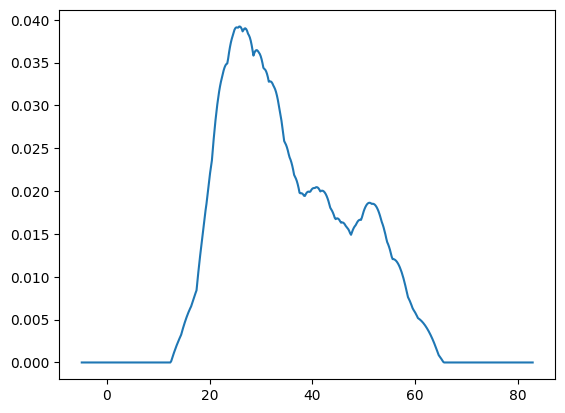

In [23]:
#check
#grid, kde = kernel_density(x)
#sns.lineplot(x=grid,y=kde)
#grid, kde = kernel_density(x, kernel='uniform')
#sns.lineplot(x=grid,y=kde)
#grid, kde = kernel_density(x, kernel='epanechnikov')
#sns.lineplot(x=grid,y=kde)

[Text(0.5, 1.0, "Seaborn's Kernel Density Plot"),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, '$\\hat{f}(x)$')]

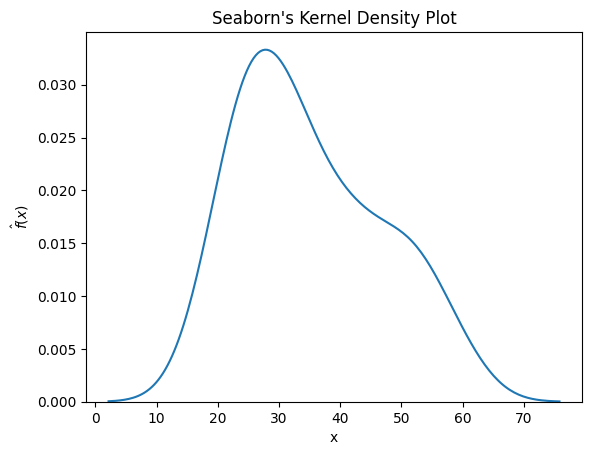

In [ ]:
#Check with seaborn
fig = sns.kdeplot(x)
fig.set(title="Seaborn's Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
#2.1
cc = pd.read_csv('college_completion.csv')


In [ ]:
#2.2
print("College completion shape:")
print(cc.shape, '\n')
print('3798 observations', '\n')
print("College Completion variables:")
print(cc.columns, '\n')

print(cc.head())


College completion shape:
(3798, 63) 

3798 observations 

College Completion variables:
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere

*   There are 3798 observations
*   Dimensions 3798, 63
*   There are a lot of variables included that can be seen above!





In [26]:
#2.3
#Check variables:
#print(cc['control'].unique(),'\n')
#print(cc['level'].unique(),'\n')
pd.crosstab(cc['control'], cc['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


After cross tabulating:
*   Majority of those at a 4-year level are at a private not-for-private college (most common)
*   Most of the 2-year level students attend a public university
*   The least common woud be a 2-year private not-for-profit college
*   Overall the 4-year level has the most data points and is more common than 2-year college


